This problem is because when keras run with gpu, it uses almost all vram. So we needed to give memory_limit for each notebook as shown below

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])
  except RuntimeError as e:
    print(e)

2022-06-06 15:36:45.826001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 15:36:45.832341: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-06 15:36:45.832590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [5]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x);

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [6]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [7]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 1.2862797 ]
 [-1.0306493 ]
 [ 0.42696485]], shape=(3, 1), dtype=float32)


In [8]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.49309623]
 [0.28193152]
 [0.8446957 ]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [12]:
import numpy as np
x = np.ones(shape=(2, 2))
print(x)
x[0, 0] = 0.
print(x)

[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]


**Creating a TensorFlow variable**

In [13]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.83607584],
       [ 0.8220239 ],
       [ 0.00579722]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [14]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [15]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [16]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [19]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

a,b,c,d,e

(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1., 1.],
        [1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1., 1.],
        [1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1., 1.],
        [1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[2., 2.],
        [2., 2.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[4., 4.],
        [4., 4.]], dtype=float32)>)

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [3]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
   print(result, input_var)
gradient = tape.gradient(result, input_var)
gradient;

tf.Tensor(9.0, shape=(), dtype=float32) <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


**Using `GradientTape` with constant tensor inputs**

In [4]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [5]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [60]:
import numpy as np 

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

print(negative_samples[0], negative_samples.shape, positive_samples.shape)

[1.572001   4.71691079] (1000, 2) (1000, 2)


**Stacking the two classes into an array with shape (2000, 2)**

In [61]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape
print(inputs[0,:])

[1.572001 4.716911]


**Generating the corresponding targets (0 and 1)**

In [63]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                    np.ones((num_samples_per_class, 1), dtype="float32")))

print(targets.shape)
targets[0][0], targets[1001][0]
targets[0, 0], targets[1001, 0] # it's tha same as the one above

(2000, 1)


(0.0, 1.0)

**Plotting the two point classes**

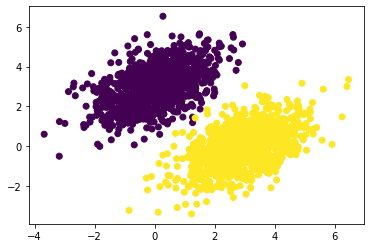

In [64]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [66]:
# the inputs will be 2d points
input_dim = 2 
# the output prediction will be a single score per sample between 0 and 1
output_dim = 1 
# weights
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
# biases
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

print(W)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.38842225],
       [0.5574262 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


**The forward pass function**

In [67]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [68]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [69]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs) #forward pass inside a gradient tape scope
        loss = square_loss(targets, predictions) #forward pass inside a gradient tape scope
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) #retrieve the gradient of the loss with regard to W and b
    W.assign_sub(grad_loss_wrt_W * learning_rate) #update the W
    b.assign_sub(grad_loss_wrt_b * learning_rate) #update the b
    return loss

**The batch training loop**

In [70]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.1388
Loss at step 1: 0.3121
Loss at step 2: 0.1394
Loss at step 3: 0.1108
Loss at step 4: 0.1008
Loss at step 5: 0.0937
Loss at step 6: 0.0875
Loss at step 7: 0.0819
Loss at step 8: 0.0768
Loss at step 9: 0.0722
Loss at step 10: 0.0679
Loss at step 11: 0.0641
Loss at step 12: 0.0605
Loss at step 13: 0.0573
Loss at step 14: 0.0544
Loss at step 15: 0.0518
Loss at step 16: 0.0493
Loss at step 17: 0.0471
Loss at step 18: 0.0451
Loss at step 19: 0.0433
Loss at step 20: 0.0416
Loss at step 21: 0.0401
Loss at step 22: 0.0387
Loss at step 23: 0.0375
Loss at step 24: 0.0363
Loss at step 25: 0.0353
Loss at step 26: 0.0343
Loss at step 27: 0.0334
Loss at step 28: 0.0326
Loss at step 29: 0.0319
Loss at step 30: 0.0313
Loss at step 31: 0.0307
Loss at step 32: 0.0301
Loss at step 33: 0.0296
Loss at step 34: 0.0292
Loss at step 35: 0.0288
Loss at step 36: 0.0284
Loss at step 37: 0.0280
Loss at step 38: 0.0277
Loss at step 39: 0.0274


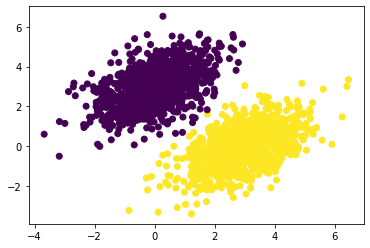

In [71]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

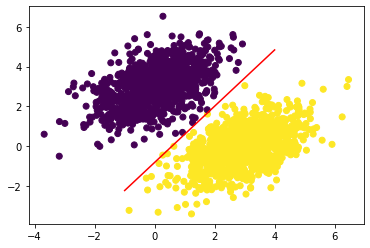

In [72]:
x = np.linspace(-1, 4, 100) #generates 100 reguraly spaced numbers between -1 and 4 
y = - W[0] /  W[1] * x + (0.5 - b) / W[1] #line equation, same as y = ax + b -- converted from (w1*x + w2*y + b = 0.5)
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

In [ ]:
history.history

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

## Summary